In [1]:
! pip install numpy matplotlib tensorflow

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout





In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape , X_test.shape , y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

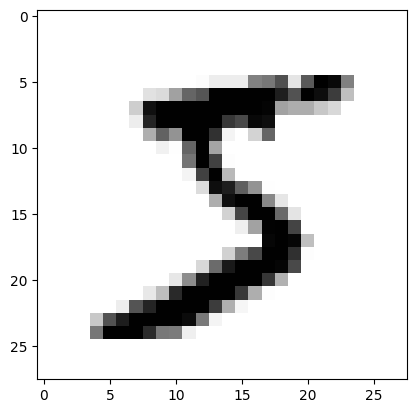

In [5]:
plt.imshow(X_train[0] , cmap = 'binary')

In [6]:
def  plot_input(i):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

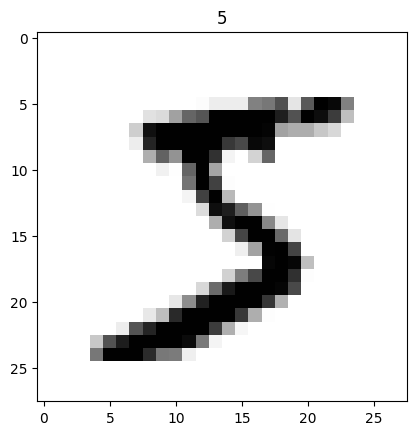

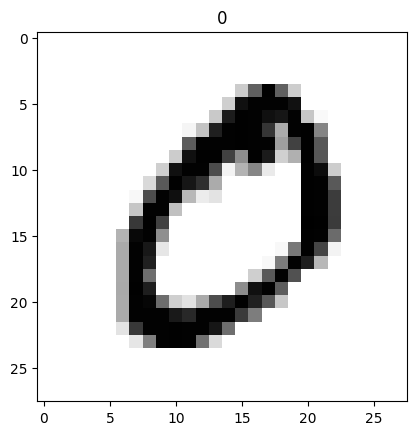

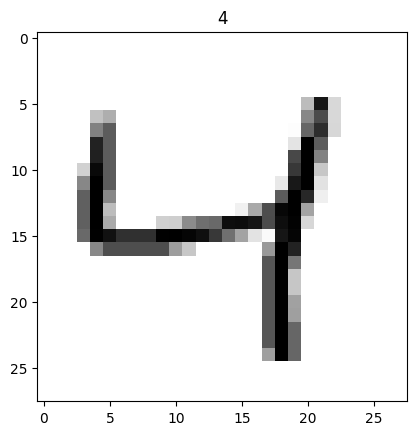

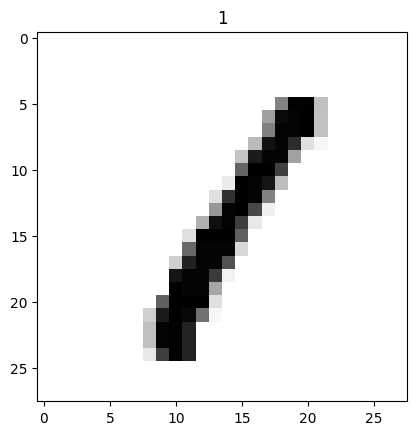

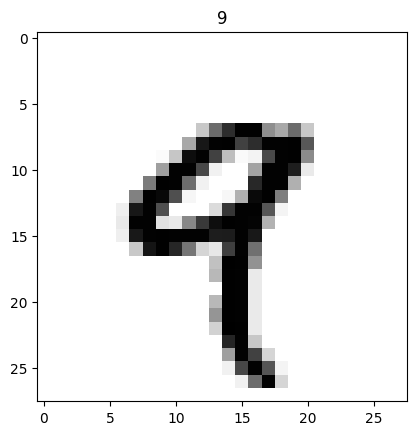

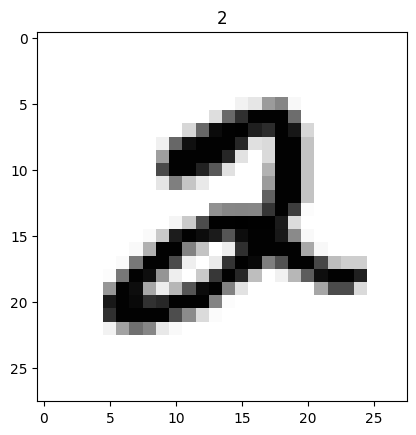

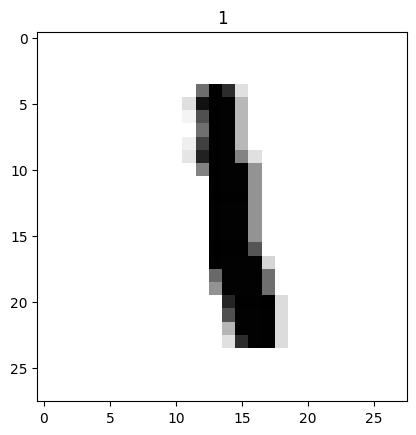

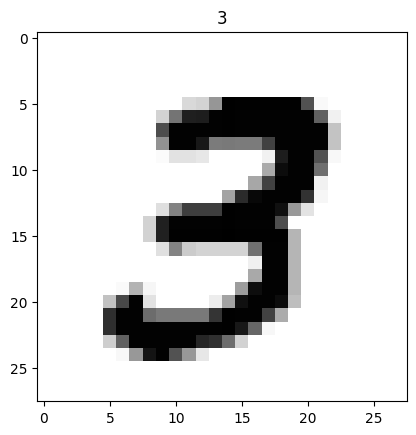

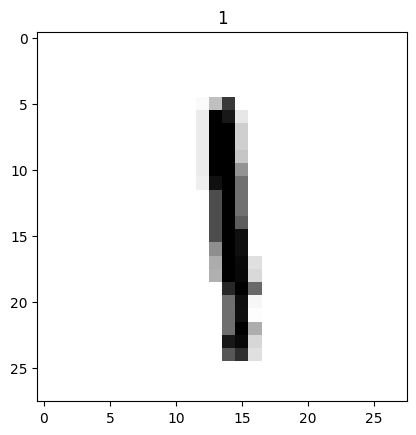

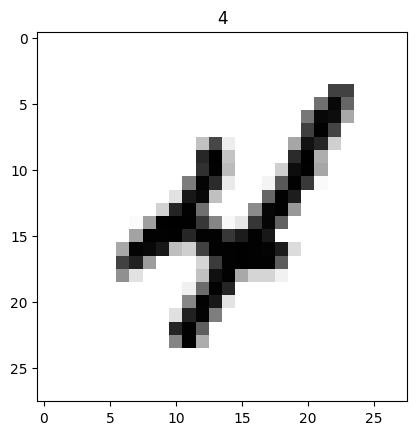

In [7]:
for i in range(10):
  plot_input(i)

In [8]:
 # prepocess the data
 # normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


#Reshape / expand the dimentions of images to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


# on ajoute cette dimension car toujours cnn attent une image de la forme  (hauteur, largeur, canaux)  c'est pour cela on ajoute au moins une seul dimennsion


In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
# si je veuxsupprimer une dimension ajouté
#X_train = np.squeeze(X_train, axis=-1)
#X_test = np.squeeze(X_test, axis=-1)


In [11]:
# convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
#building the model
model = Sequential()
#couche convolution
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation ='relu'))
#couche pooling
model.add(MaxPool2D((2,2)))

# augmenter le nobmre de fois que le filtre s'applique sur l'image à 64
model.add(Conv2D(64,(3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

# pour convertir de matrice en vecteur
model.add(Flatten())

# cette couche s'utilise pour eviter surapprentissage
model.add(Dropout(0.25))

#  coche fully connected
model.add(Dense(10, activation = "softmax"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping
#EarlyStopping arrête l'entraînement si la précision de validation ne s'améliore pas après 4 époques.

es = EarlyStopping(monitor = 'val_acc' , min_delta = 0.01 ,patience = 4 , verbose = 1  )

#Model Check Point
# ModelCheckpoint enregistre le meilleur modèle en fonction de la validation. Le modèle est sauvegardé dans le fichier bestmodel.keras à chaque époque si sa précision de validation s'améliore.

mc = ModelCheckpoint("./bestmodel.keras", monitor="val_accuracy", verbose=1, save_best_only=True)
cb = [es,mc]

In [18]:
# mode training
his = model.fit(X_train,y_train,epochs = 5 , validation_split = 0.3 )
# Ensemble d'entraînement (Training set) : Utilisé pour entraîner le modèle.
#Ensemble de validation (Validation set) : Utilisé pour évaluer le modèle pendant l'entraînement, afin de vérifier sa capacité à se généraliser à des données qu'il n'a pas vues pendant l'entraînement.
#Ensemble de test (Test set) : Utilisé après l'entraînement pour tester la performance finale du modèle.
# Dans ton cas, lorsque tu définis validation_split=0.3, cela signifie que 30% des données d'entraînement seront utilisées pour la validation, et les 70% restants seront utilisés pour l'entraînement du modèle.

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8600 - loss: 0.4673 - val_accuracy: 0.9761 - val_loss: 0.0811
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9742 - loss: 0.0792 - val_accuracy: 0.9833 - val_loss: 0.0563
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9810 - loss: 0.0602 - val_accuracy: 0.9844 - val_loss: 0.0495
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9858 - val_loss: 0.0448
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9865 - val_loss: 0.0430


In [19]:
model.save("/content/bestmodel.keras")


In [20]:
from tensorflow.keras.models import load_model
model_S = keras.models.load_model("/content/bestmodel.keras")
 #chargement du modèle sauvegardé pour les tests.

In [21]:
!ls /content

bestmodel.keras  sample_data


In [22]:
score = model_S.evaluate(X_test,y_test)
print(f" the model accuracy is {score[1]}")
# Évaluation du modèle sur l'ensemble de test pour obtenir la précision du modèle sur des données qu'il n'a pas vues pendant l'entraînement.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0441
 the model accuracy is 0.9889000058174133


In [ ]:
# code application python


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


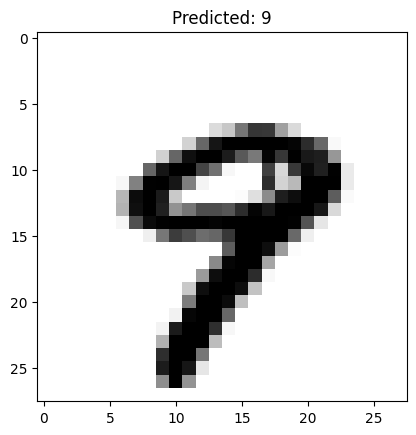

The model predicts: 9


In [23]:
# Choisir une image dans le jeu de test (index de l'image)
index = 9  # Vous pouvez changer cet index pour tester d'autres images
image_to_test = X_test[index].reshape(1, 28, 28, 1)  # Reshape pour correspondre à la forme d'entrée du modèle

# Faire une prédiction sur l'image
prediction = model_S.predict(image_to_test)

# Trouver la classe prédite (le chiffre)
predicted_class = np.argmax(prediction)

# Afficher l'image et la prédiction
plt.imshow(X_test[index].reshape(28, 28), cmap='binary')  # Afficher l'image du test
plt.title(f"Predicted: {predicted_class}")  # Afficher la classe prédite (chiffre)
plt.show()

print(f"The model predicts: {predicted_class}")

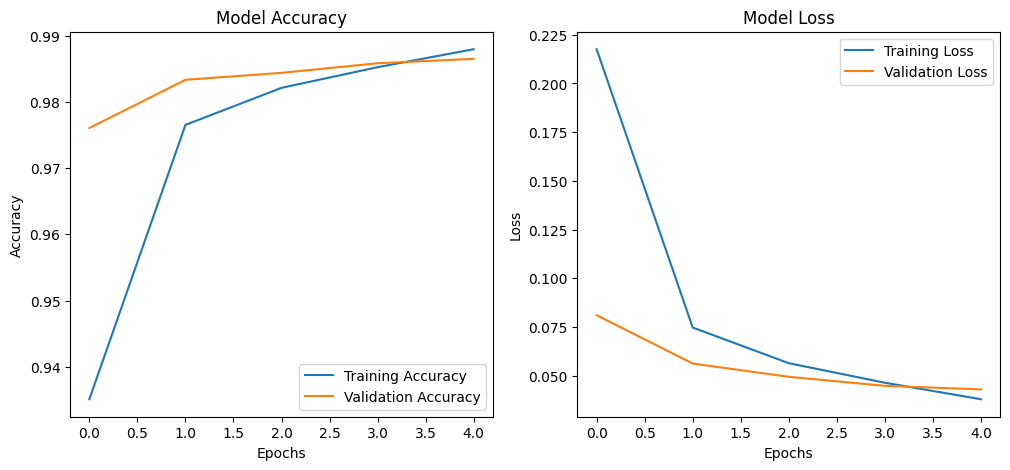

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


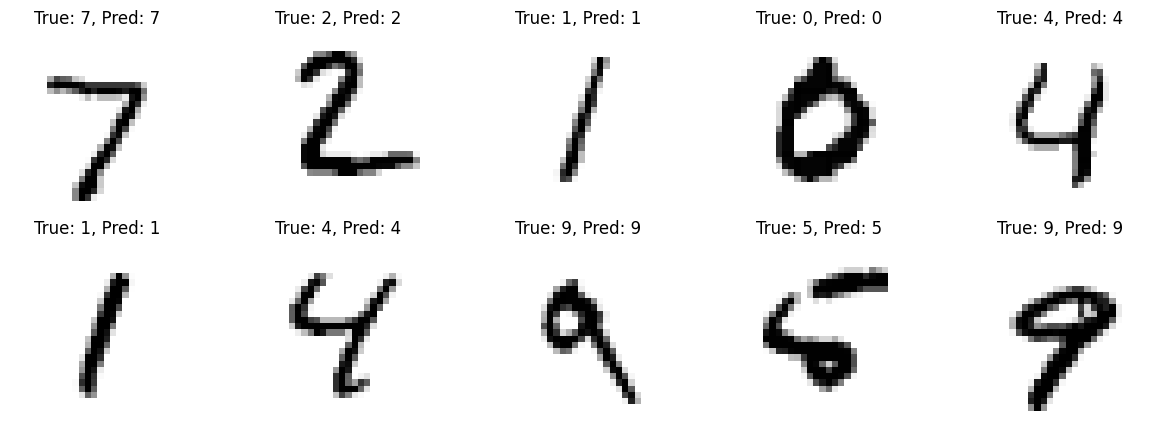

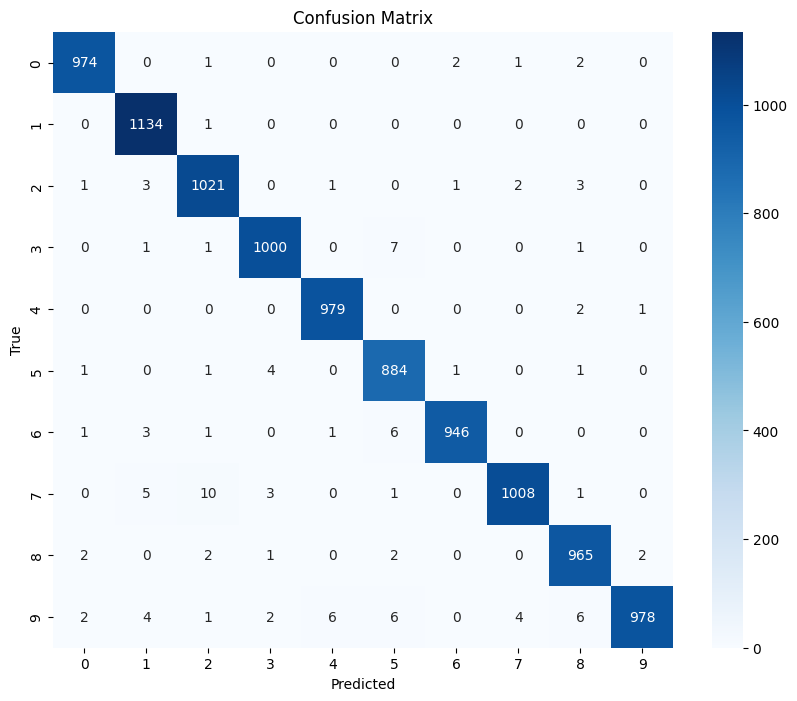

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Tracer les courbes de précision et de perte
def plot_metrics(history):
    # Précision
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(his)

# Prédire sur les données de test
y_pred = model_S.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Afficher quelques exemples
def display_predictions(num_examples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='binary')
        plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")
        plt.axis('off')
    plt.show()

display_predictions()

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


In [25]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [26]:
import gradio as gr
import numpy as np
from PIL import Image
import keras
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model("/content/bestmodel.keras")  # Changez le chemin vers votre modèle sauvegardé

# Fonction de prédiction
def predict_digit(image):
    try:
        # Vérification du format de l'image
        if isinstance(image, np.ndarray):
            print("Image reçue sous forme de tableau NumPy.")
        else:
            print("Image reçue sous forme de type non NumPy.")
            # Si l'image est en format PIL ou autre, convertissez-la en tableau NumPy
            image = np.array(image)

        # Convertir en niveaux de gris (grayscale)
        image = Image.fromarray(image).convert("L")  # Convertir en noir et blanc
        image = image.resize((28, 28))  # Redimensionner l'image à 28x28 pixels

        # Convertir l'image en tableau NumPy et normaliser les pixels entre 0 et 1
        img_array = np.array(image) / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)  # Reshaper l'image pour qu'elle corresponde à l'entrée du modèle

        # Effectuer la prédiction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Récupérer la classe avec la probabilité la plus élevée

        return f"Le chiffre prédit est : {predicted_class}"

    except Exception as e:
        return f"Erreur dans la prédiction : {e}"

# Créer l'interface Gradio
interface = gr.Interface(
    fn=predict_digit,  # La fonction qui effectue la prédiction
    inputs=gr.Image(type="numpy"),  # Zone pour dessiner et obtenir l'image sous forme de tableau NumPy
    outputs="text",  # Afficher le texte de la prédiction
    title="Classification de Chiffres Manuscrits",  # Titre de l'application
    description="Dessinez un chiffre dans la zone ci-dessous et soumettez-le pour obtenir une prédiction."
)

# Lancer l'interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a461c18ba8fe9c8fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
!zip -r model_folder.zip /content/sample_data


  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/README.md (deflated 39%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)


In [29]:
from google.colab import files
files.download('model_folder.zip')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>